In [1]:
import pandas as pd
import numpy as np
from factor_backtest import preprocess
from factor_backtest import group_calc
from factor_backtest import factor_analysis
from factor_backtest import utils


# 载入数据

In [2]:
# 读取数据
factor_df=pd.read_csv('../data/csp_composite.csv')
bp_df = pd.read_csv('../data/pb.csv')
ret_df=pd.read_csv('../data/ret_df.csv')
mktmv_df = pd.read_csv('../data/ltsz.csv')
benchmark = pd.read_csv('../data/index_ret.csv')
ind_df=pd.read_csv('../data/ind_df.csv')
# 处理股票代码
codefunc1=lambda x: '{:0>6}'.format(x)
factor_df['stock_code']=factor_df['stock_code'].apply(codefunc1)
bp_df['stock_code']=bp_df['stock_code'].apply(codefunc1)
ret_df['stock_code']=ret_df['stock_code'].apply(codefunc1)
# mktmv_df['stock_code']=mktmv_df['stock_code'].apply(codefunc1)
ind_df['stock_code']=ind_df['stock_code'].apply(codefunc1)
# 处理日期
codefunc2 = lambda x: x if pd.isna(x) else str(int(x))
factor_df['trade_date'] = pd.to_datetime(factor_df['trade_date'], format='%Y-%m-%d')
## 转为‘%Y%m%d’
factor_df['trade_date'] = factor_df['trade_date'].dt.strftime('%Y%m%d')
# factor_df['trade_date']=factor_df['trade_date'].apply(codefunc2)
## ret_df['trade_date']转为 日期格式 
ret_df['trade_date'] = pd.to_datetime(ret_df['trade_date'], format='%Y-%m-%d')
## 转为‘%Y%m%d’
ret_df['trade_date'] = ret_df['trade_date'].dt.strftime('%Y%m%d')
ret_df['trade_date']=ret_df['trade_date'].apply(codefunc2)
mktmv_df['trade_date']=mktmv_df['trade_date'].apply(codefunc2)


bp_df['trade_date']=bp_df['trade_date'].apply(codefunc2)

ind_df['trade_date'] = pd.to_datetime(ind_df['trade_date'], format='%Y-%m-%d')
## 转为‘%Y%m%d’
ind_df['trade_date'] = ind_df['trade_date'].dt.strftime('%Y%m%d')
ind_df['trade_date']=ind_df['trade_date'].apply(codefunc2)
benchmark['trade_date'] = benchmark['trade_date'].apply(codefunc2)
# ind_df

# 预处理

In [3]:
factor_df = factor_df.dropna()
## drop 0
factor_df = factor_df[factor_df['factor']!=0]
factor_df = utils.get_previous_factor(factor_df)

In [4]:
mktmv_df = mktmv_df.dropna()
mktmv_df = utils.get_previous_factor(mktmv_df)

# mktmv_df

In [5]:
bp_df = bp_df.dropna()
# bp_df

In [6]:
# 处理factor因子
# MAD去极值
factor_df = preprocess.select_stock(factor_df,index_name = None,drop_hk = True,drop_bj = True)
factor_df = factor_df[['trade_date', 'stock_code', 'factor']]
# factor_df['factor'] = - factor_df['factor']
factor_df = preprocess.del_outlier(factor_df, 'factor', method='mad', n=3)
# # 排序标准化
# factor_df = preprocess.standardize(factor_df, 'factor', method='rank')
# # 同时做市值中性化和行业中性化
# factor_df=preprocess.neutralize(factor_df=factor_df,
#                                  factor_name='factor',
#                                  mktmv_df=mktmv_df,
#                                  industry_df=ind_df)

factor_df

,trade_date,stock_code,factor
0,20100205,601898.SH,-0.001941
1,20100205,600062.SH,-0.092861
2,20100205,002240.SZ,-0.009548
3,20100205,000915.SZ,0.154332
4,20100205,002097.SZ,-0.052391
...,...,...,...
12013858,20250213,603026.SH,0.417600
12013859,20250213,688456.SH,0.128407
12013860,20250213,301033.SZ,0.062276
12013861,20250213,600177.SH,0.816023


# 分组收益率计算

In [7]:
mw_group_ret = group_calc.get_group_ret(factor_df, ret_df, 'factor', 10, None)
mw_group_ret

d:\onedrive - cuhk-shenzhen\量化研究\factor_backtest-main\base\src\factor_backtest\group_calc.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


,Group0,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,H-L
20100208,-0.000256,0.000902,-0.001556,0.002972,0.000253,-0.000360,0.002847,0.005008,0.003612,0.004681,0.004937
20100209,-0.004788,0.000531,-0.000671,0.000176,0.001568,0.002402,0.002204,0.005142,0.001660,0.005392,0.010180
20100210,0.012115,0.012731,0.015591,0.014365,0.015194,0.014179,0.015092,0.010637,0.010452,0.012463,0.000348
20100211,-0.006654,-0.005327,-0.003067,-0.001573,-0.002928,-0.002678,0.002247,0.000503,-0.000708,0.002456,0.009110
20100212,0.016528,0.013849,0.013640,0.013251,0.012500,0.014552,0.013023,0.010744,0.010655,0.008981,-0.007547
...,...,...,...,...,...,...,...,...,...,...,...
20250121,0.015073,0.002607,-0.000509,-0.002918,-0.004358,-0.003448,-0.004308,-0.005874,-0.003542,-0.004941,-0.020015
20250122,-0.007684,-0.010799,-0.013216,-0.012197,-0.013596,-0.010451,-0.009934,-0.009572,-0.007620,-0.007374,0.000311
20250123,-0.009497,-0.005275,-0.003797,-0.001782,-0.000914,0.000644,-0.000520,-0.000228,0.002184,0.004096,0.013592
20250124,0.017312,0.013956,0.012977,0.012832,0.014990,0.012012,0.010968,0.008948,0.006473,0.005863,-0.011448


# 因子分析

In [8]:
mw_group_ret = mw_group_ret.dropna()

In [9]:
factor_analysis.newy_west_test(mw_group_ret['H-L'],'factor')

{'factor_name': ['factor'],
 'ret_mean(%)': [0.115],
 't-value': [6.055],
 'p-value': [0.0],
 'p-star': ['***']}

# IC检验

In [10]:
ic_dct, ic_fig = factor_analysis.analysis_factor_ic(factor_df, ret_df, 'factor')
pd.DataFrame(ic_dct)


,因子名称,IC均值,IC标准差,IR比率,IC>0的比例(%),IC>0.02的比例(%)
0,factor,0.009956,0.123483,0.080629,54.367594,46.872417


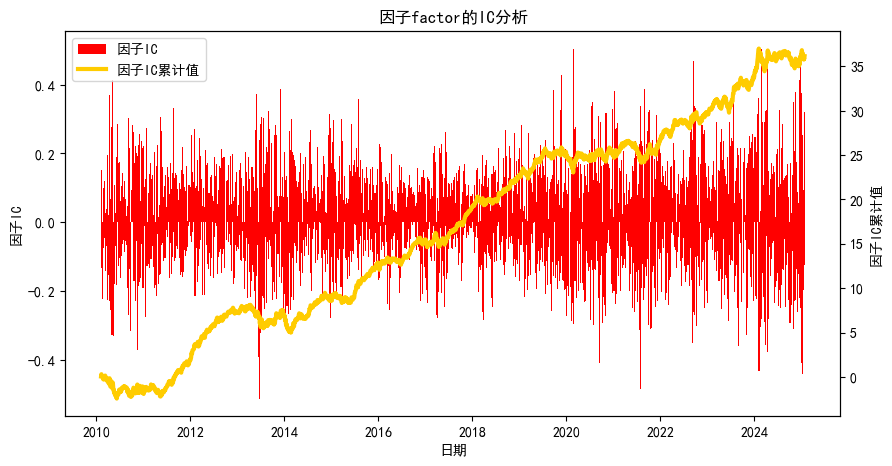

In [11]:
ic_fig

# RankIC 检验

In [12]:
rank_ic_dct, rank_ic_fig = factor_analysis.analysis_factor_rank_ic(factor_df, ret_df, 'factor')
pd.DataFrame(rank_ic_dct)

,因子名称,RankIC均值,RankIC标准差,RankIR比率,RankIC>0的比例(%),RankIC>0.02的比例(%)
0,factor,0.032395,0.138166,0.234464,59.988978,53.403141


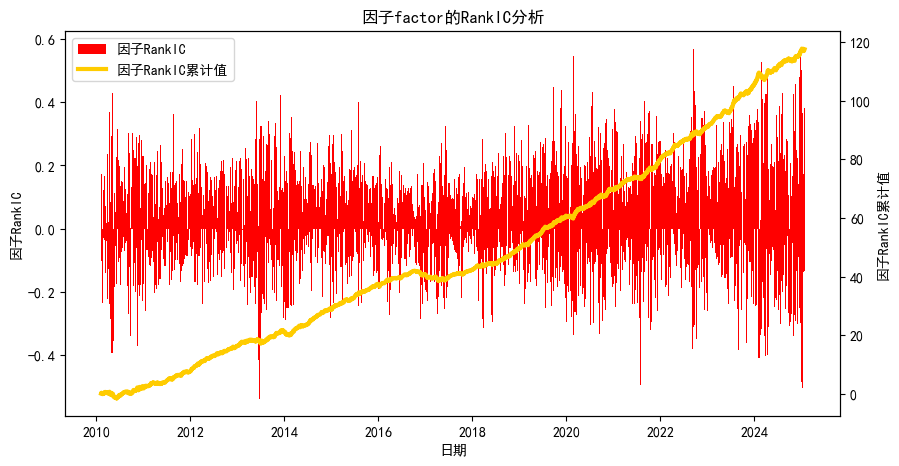

In [13]:
rank_ic_fig

# 净值曲线

In [14]:
ew_backtest_df,ew_fig1,ew_fig2=group_calc.analysis_group_ret(factor_df, ret_df, 'factor', n_groups=10, benchmark=None, mktmv_df=None)
ew_backtest_df

d:\onedrive - cuhk-shenzhen\量化研究\factor_backtest-main\base\src\factor_backtest\group_calc.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


,Group0,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,H-L
年化收益率(%),-14.530524,2.640746,5.502623,8.646214,11.892406,12.999014,13.609879,16.405230,16.442050,16.620270,31.423738
年化波动率(%),32.455316,30.364639,29.680940,29.160595,28.590176,28.155430,27.672224,27.156476,26.509250,25.142055,17.999097
夏普比率,-0.447709,0.086968,0.185392,0.296503,0.415961,0.461688,0.491825,0.604100,0.620238,0.661055,1.745851
最大回撤(%),-95.695196,-74.626909,-67.527753,-65.121066,-61.700415,-58.920604,-58.241865,-54.636781,-54.876215,-50.946822,-21.580083


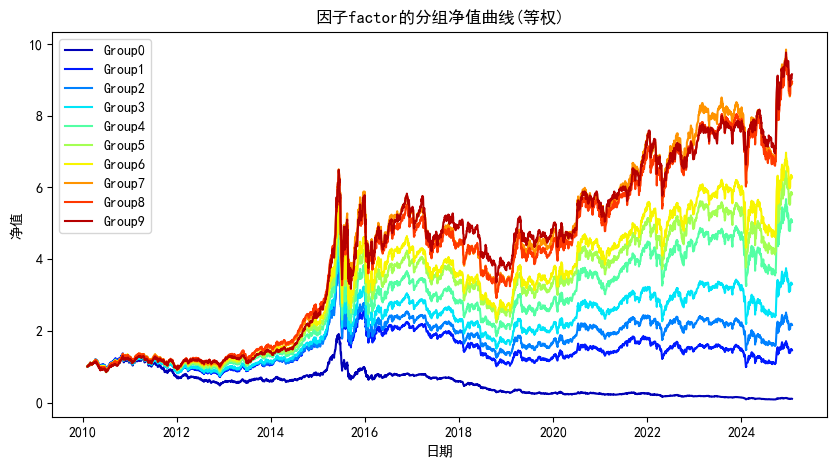

In [15]:
ew_fig1

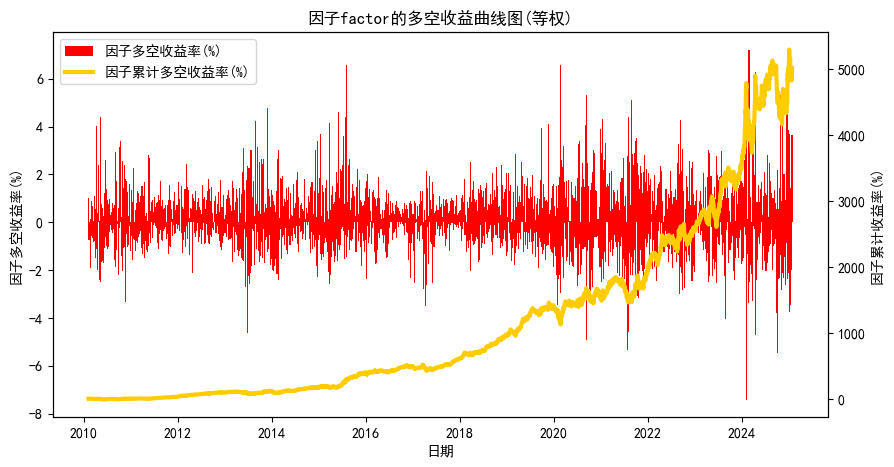

In [16]:
ew_fig2

In [17]:
mw_backtest_df,mw_fig1,mw_fig2=group_calc.analysis_group_ret(factor_df, ret_df, 'factor', n_groups=10, mktmv_df=mktmv_df)
mw_backtest_df

d:\onedrive - cuhk-shenzhen\量化研究\factor_backtest-main\base\src\factor_backtest\group_calc.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


,Group0,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8,Group9,H-L
年化收益率(%),-12.147044,-3.657815,0.982509,6.355158,6.048840,9.184825,6.343627,7.516559,8.401704,6.725520,15.452486
年化波动率(%),30.109912,27.654810,26.392618,25.923421,25.291757,24.643299,24.212582,23.937085,23.563090,21.801342,24.203771
夏普比率,-0.403423,-0.132267,0.037227,0.245151,0.239163,0.372711,0.261997,0.314013,0.356562,0.308491,0.638433
最大回撤(%),-93.636595,-81.065380,-66.613786,-53.952558,-58.594147,-48.832894,-49.951464,-42.496102,-51.343455,-47.945633,-44.457662


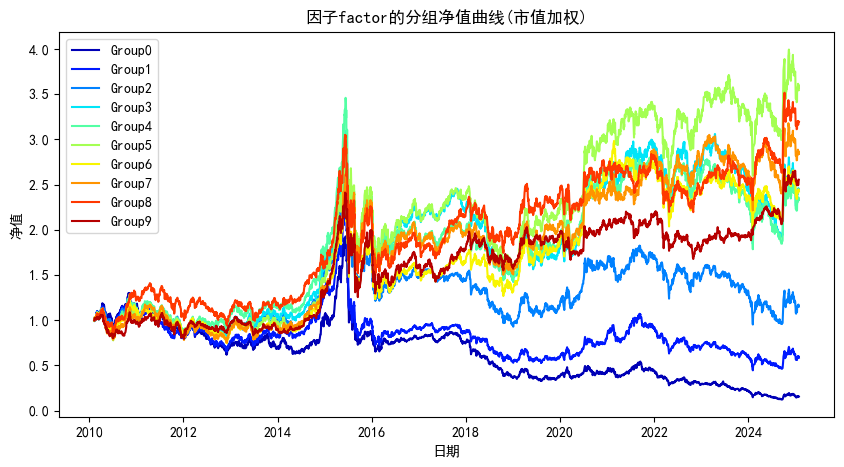

In [18]:
mw_fig1

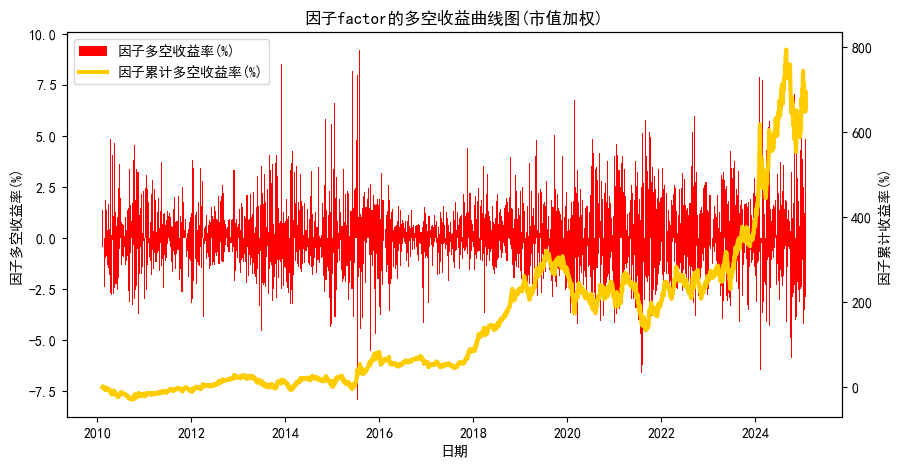

In [19]:
mw_fig2

# 序贯双重排序

In [20]:
db_sort_group_ret = group_calc.get_double_sort_group_ret(
    bp_df,
    factor_df,
    ret_df,
    "bp",
    "factor",
    5,
    5,
    mktmv_df=mktmv_df,
)
db_sort_group_ret

ValueError: The columns of df must be var_lst:trade_date, stock_code, bp

In [ ]:
db_sort_mean_df = group_calc.double_sort_mean(db_sort_group_ret,"bp","factor")
db_sort_mean_df

Group0  Group1  Group2  Group3  Group4    H-L
Group0 ret_mean(%)  -0.016   0.034   0.052   0.062   0.119  0.135
       t-value      -0.538   0.301   1.327   2.109   1.446  3.161
Group1 ret_mean(%)  -0.023   0.011   0.045   0.075   0.060  0.082
       t-value      -0.387   0.655   1.034   2.063   2.315  4.694
Group2 ret_mean(%)  -0.016   0.024   0.033   0.069   0.089  0.104
       t-value      -0.370   0.402   1.419   1.723   2.631  5.166
Group3 ret_mean(%)  -0.016   0.016   0.055   0.063   0.104  0.120
       t-value      -0.913   0.828   1.767   1.623   2.635  5.986
Group4 ret_mean(%)  -0.040   0.034   0.067   0.063   0.107  0.146
       t-value      -0.406   1.021   1.504   1.621   2.494  4.716

In [ ]:
db_sort_backtest_df = group_calc.double_sort_backtest(db_sort_group_ret, "bp", "factor", benchmark=None, period="DAILY")
db_sort_backtest_df

Group0     Group1     Group2     Group3     Group4  \
Group0 年化收益率(%)  -7.436262   5.512445  10.361937  12.803682  28.989756   
       年化波动率(%)  27.071767  24.762032  25.486265  26.767197  30.220327   
       夏普比率      -0.274687   0.222617   0.406569   0.478335   0.959280   
       最大回撤(%)  -78.391544 -52.160429 -42.243271 -57.900955 -56.252165   
Group1 年化收益率(%)  -9.298901  -0.601984   8.598528  16.892260  11.357437   
       年化波动率(%)  28.393189  25.751979  24.286369  25.831422  29.349082   
       夏普比率      -0.327505  -0.023376   0.354047   0.653942   0.386978   
       最大回撤(%)  -83.312118 -67.489785 -45.986533 -47.784046 -52.546035   
Group2 年化收益率(%)  -7.568670   2.722847   5.770138  15.522539  20.347373   
       年化波动率(%)  28.026229  25.492258  23.527802  23.983286  27.333020   
       夏普比率      -0.270057   0.106811   0.245248   0.647223   0.744425   
       最大回撤(%)  -82.147144 -58.063365 -55.361540 -41.922520 -42.561671   
Group3 年化收益率(%)  -8.073216   0.075626  10.755262  13.411939  25.109939   
       年化波动率(%)  29.598119  28.012199  26.611420  25.643610  27.321074   
       夏普比率      -0.272761   0.002700   0.404160   0.523013   0.919069   
       最大回撤(%)  -80.150841 -72.603460 -49.604616 -45.991029 -38.621724   
Group4 年化收益率(%) -13.697476   4.508260  14.076080  13.187578  25.929859   
       年化波动率(%)  30.409841  28.443554  27.036484  26.672636  27.429556   
       夏普比率      -0.450429   0.158498   0.520633   0.494423   0.945325   
       最大回撤(%)  -93.056377 -66.207721 -55.835640 -53.215407 -43.467738   

                       H-L  
Group0 年化收益率(%)  37.899654  
       年化波动率(%)  19.774921  
       夏普比率       1.916552  
       最大回撤(%)  -17.851882  
Group1 年化收益率(%)  21.258026  
       年化波动率(%)  17.307382  
       夏普比率       1.228264  
       最大回撤(%)  -36.355467  
Group2 年化收益率(%)  28.524221  
       年化波动率(%)  14.859551  
       夏普比率       1.919588  
       最大回撤(%)  -22.850264  
Group3 年化收益率(%)  33.603688  
       年化波动率(%)  15.403356  
       夏普比率       2.181582  
       最大回撤(%)  -21.593425  
Group4 年化收益率(%)  42.715454  
       年化波动率(%)  16.237084  
       夏普比率       2.630734  
       最大回撤(%)  -30.650307

# Fama-Macbeth回归

In [ ]:
two_factor_df = pd.merge(factor_df, bp_df, on=['trade_date', 'stock_code'])
fmreg_res_dct = factor_analysis.fama_macbeth_reg(ret_df, two_factor_df, ['factor', 'bp'])
fmreg_res_dct

AssertionError: 

In [ ]:
ret_df

,trade_date,stock_code,ret
0,20100104,000001.SZ,-0.027085
1,20100105,000001.SZ,-0.017292
2,20100106,000001.SZ,-0.017169
3,20100107,000001.SZ,-0.010921
4,20100108,000001.SZ,-0.002207
...,...,...,...
14627603,20250122,9997.HK,0.013333
14627604,20250123,9997.HK,-0.001645
14627605,20250124,9997.HK,0.028007
14627606,20250127,9997.HK,0.022436


In [ ]:
two_factor_df

,trade_date,stock_code,factor,bp
0,20140129,000001.SZ,0.023419,0.006025
1,20140130,000001.SZ,0.057419,-0.131192
2,20140207,000001.SZ,0.076329,-0.031149
3,20140210,000001.SZ,-0.179076,0.025837
4,20140211,000001.SZ,-0.168375,0.065413
...,...,...,...,...
7194986,20221212,688981.SH,1.156058,0.895736
7194987,20221213,688981.SH,0.886304,0.889854
7194988,20221214,688981.SH,0.691800,0.882755
7194989,20221215,688981.SH,0.637557,0.900426
